## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
import numpy as np
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table

import matplotlib.pyplot as plt

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
# combine the data into a single dataset

merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev= merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = merge_table.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [5]:
summary_df = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance, "Standard Deviation":standard_dev,"SEM": SEM})

## Bar plots

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
table_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()

DataPoints = table_df[["Drug Regimen", "Mouse ID"]]

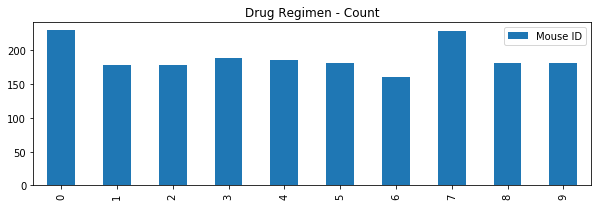

In [7]:
#DataFrame.plot

DataPoints.plot(kind="bar",figsize=(10,3))
plt.title("Drug Regimen - Count")
plt.show()


In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Regimes
drugs_table = summary_df.index.tolist()

In [9]:
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

In [10]:
x_axis = np.arange(len(regimen_count))

<BarContainer object of 10 artists>

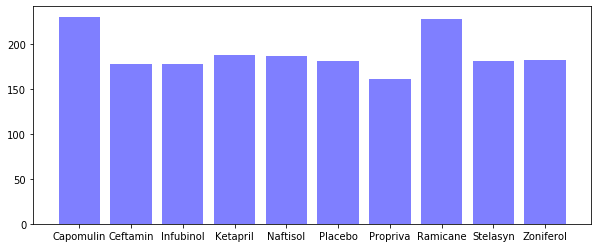

In [11]:
#define x_xix
x_axis = drugs_table
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

## Pie plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df=pd.DataFrame(merge_table.groupby(["Sex"],).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})


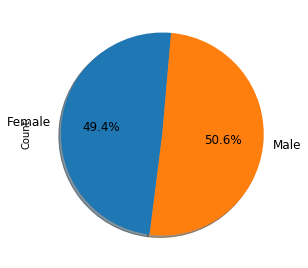

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=85, shadow=True, labels=gender_df['Sex'], legend = False, fontsize=12)

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_volumn = merge_table.groupby("Mouse ID")["Tumor Volume (mm3)"].sum()
tumor_volume_df=pd.DataFrame(tumor_volumn)

tumor_volume_df.sort_values(by='Tumor Volume (mm3)', ascending=False                                                                                                                                                      )
tumor_volume_df.head()

,Tumor Volume (mm3)
Mouse ID,
a203,563.127077
a251,552.370946
a262,586.116306
a275,527.709651
a366,382.479341


In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot =(tumor_volume_df.(Tumor Volume (mm3))

SyntaxError: invalid syntax (<ipython-input-32-446bc80d06f6>, line 2)

## Line and scatter plots

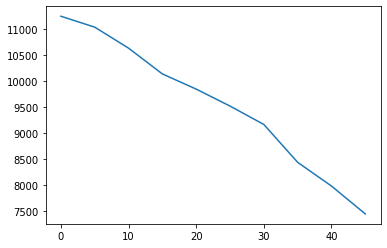

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

tumor_volumn = merge_table[merge_table["Timepoint"].isin(["Capomulin"])]
time_point = merge_table.groupby("Timepoint")["Tumor Volume (mm3)"].sum()
tumor_volume_df = pd.DataFrame(time_point)
plt.plot(tumor_volume_df)


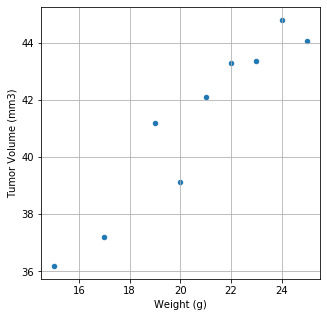

In [44]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = merge_table[merge_table["Drug Regimen"].isin(["Capomulin"])]
capomulin_data = capomulin_data[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_data = capomulin_data.sort_values(["Weight (g)"], ascending=True)
capomulin_scatter_plot = capomulin_data.reset_index()
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (5,5))

